In [1]:
# Model is: production_per_capita = d1 + d2 + c1 + c2*ln(GDP_per_capita,t) + c3*ln(production_per_capita,t-1)

# Q1. how to perform this using a python package
# Q2. how to perform regression over all 21 economies at the same time to generate 21 regressions?

# https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

In [2]:
# testing regression of steel demand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
data = pd.read_csv("04_CHL.csv")
data.set_index('year',inplace=True)
data.head()

,GDP,Pop,Steel
year,,,
1980,75244937.47,11178.81699,809000
1981,78802559.99,11348.44199,724000
1982,70661594.54,11527.27403,334000
1983,67980358.79,11714.44195,462000
1984,73394748.44,11908.18892,628000


In [4]:
# data in per capita
data_pop = data[['GDP','Steel']].div(data.Pop, axis=0)
data_pop.head()

,GDP,Steel
year,,
1980,6731.028653,72.369017
1981,6943.910015,63.797304
1982,6129.948360,28.974760
1983,5803.123963,39.438498
1984,6163.384620,52.736819


In [5]:
# create logged terms
data_log = np.log(data_pop)
data_log.head()

,GDP,Steel
year,,
1980,8.814483,4.281778
1981,8.845620,4.155711
1982,8.720942,3.366425
1983,8.666152,3.674742
1984,8.726381,3.965314


In [6]:
Xs = data_log.drop(['Steel'], axis=1)
y = data_log['Steel'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print(reg.coef_)
print(reg.intercept_)

[[1.01876557]]
[-4.93437811]


In [8]:
reg.score(Xs, y)

0.882809892514868

In [9]:
#X = np.column_stack((data['GDP'], data['Pop']))
X = data_log['GDP']
y = data_log['Steel']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Steel   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           7.21e-18
Time:                        22:14:57   Log-Likelihood:                 12.947
No. Observations:                  37   AIC:                            -21.89
Df Residuals:                      35   BIC:                            -18.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9344      0.594     -8.301      0.0

C:\Users\david\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


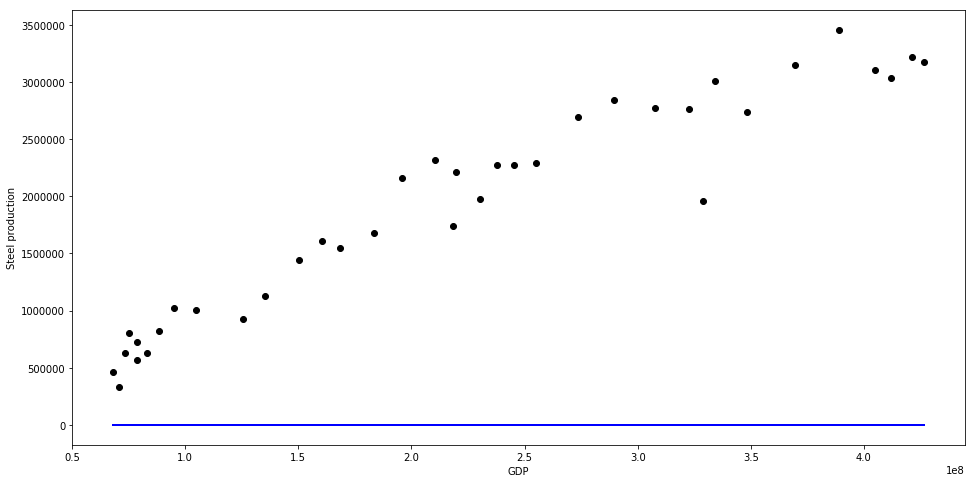

In [10]:
predictions = reg.predict(Xs)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['GDP'],
    data['Steel'],
    c='black'
)
plt.plot(
    data['GDP'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("GDP")
plt.ylabel("Steel production")
plt.show()

In [11]:
# use GDP and population projections
data2 = pd.read_csv("04_CHL_forecast.csv")

In [12]:
data2.set_index('year',inplace=True)

data2.head()

,GDP,Pop
year,,
2017,433123906.6,17910
2018,457489274.7,18055
2019,482243933.1,18197
2020,507191163.8,18336
2021,532183277.9,18472


In [13]:
Xproj = np.column_stack((data2['GDP'], data2['Pop']))

predictions = reg.predict(Xproj)

ValueError: shapes (34,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(
    data2.index,
    predictions,
    c='blue',
    linewidth=2
)
plt.plot(
    data.index,
    data['Steel'],
    c='red',
    linewidth=2
)
plt.xlabel("GDP")
plt.ylabel("Steel production")
plt.show()

In [6]:
# testing log
#Create a DataFrame
df1 = {
     'Name':['George','Andrea','micheal','maggie','Ravi','Xien','Jalpa'],
   'University_Rank':[6,47,21,74,32,77,8]}
 
df1 = pd.DataFrame(df1,columns=['Name','University_Rank'])
print(df1)

      Name  University_Rank
0   George                6
1   Andrea               47
2  micheal               21
3   maggie               74
4     Ravi               32
5     Xien               77
6    Jalpa                8


In [7]:
df1['log_value'] = np.log(df1['University_Rank'])
print(df1)    

      Name  University_Rank  log_value
0   George                6   1.791759
1   Andrea               47   3.850148
2  micheal               21   3.044522
3   maggie               74   4.304065
4     Ravi               32   3.465736
5     Xien               77   4.343805
6    Jalpa                8   2.079442
